In [2]:
# Import the packages for experiment
import warnings

warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import random
import keras

from itertools import product
from joblib import Parallel, delayed

In [3]:
### MAIN HYPERPARAMS ###
num_points_per_task = 500
shift_num = 6
task_num = 20
tree_num = 10
########################

In [4]:
# load image datasets from the CIFAR-100 database
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

# modify data shapes for specific model
data_x = np.concatenate([X_train, X_test])
data_x = data_x.reshape(
    (data_x.shape[0], data_x.shape[1] * data_x.shape[2] * data_x.shape[3])
)
data_y = np.concatenate([y_train, y_test])
data_y = data_y[:, 0]

In [5]:
from functions.binning import KBinsDiscretize
data_x = KBinsDiscretize(data_x)


[[15. 15. 15. ...  8. 10.  4.]
 [15. 15. 15. ... 15. 15. 15.]
 [15. 15. 15. ... 14. 14. 14.]
 ...
 [11. 10. 11. ... 15. 15. 15.]
 [ 7.  9. 11. ...  2.  2.  2.]
 [15. 15. 15. ... 15. 15. 15.]]


In [6]:
from functions.random_class_functions import run_parallel_exp

slot_num = int(5000/num_points_per_task)
slot_fold = range(slot_num)
shift_fold = range(1, shift_num + 1, 1)

# run the L2F model
n_trees = [tree_num]
iterable = product(n_trees, shift_fold, slot_fold)
df_results = Parallel(n_jobs=-1, verbose=1)(
    delayed(run_parallel_exp)(
        data_x, data_y, ntree, num_points_per_task, task_num, slot=slot, shift=shift
    )
    for ntree, shift, slot in iterable
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished


In [7]:
from functions.random_class_functions import calculate_results

# obtain bte results
btes = calculate_results(df_results, slot_num, shift_num)

# calculate the average numbers
bte = np.mean(btes, axis=0)

# setting plot parameters
fontsize = 22
ticksize = 20

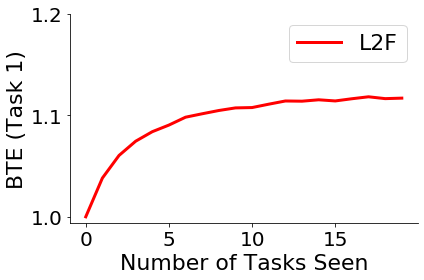

In [8]:
from functions.random_class_functions import plot_bte
    
plot_bte(bte, fontsize, ticksize)